In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score,train_test_split, KFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier,XGBRFClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
df = pd.read_csv('income_train.csv')
df_test = pd.read_csv('income_test.csv')

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 16 columns):
Unnamed: 0        22792 non-null int64
age               22792 non-null int64
workclass         22792 non-null object
fnlwgt            22792 non-null int64
education         22792 non-null object
education.num     22792 non-null int64
marital.status    22792 non-null object
occupation        22792 non-null object
relationship      22792 non-null object
race              22792 non-null object
sex               22792 non-null object
capital.gain      22792 non-null int64
capital.loss      22792 non-null int64
hours.per.week    22792 non-null int64
native.country    22792 non-null object
income            22792 non-null object
dtypes: int64(7), object(9)
memory usage: 2.8+ MB


In [5]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,12359,49,Private,180532,Masters,14,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,11680,35,Local-gov,308945,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,13682,28,Private,47907,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,8807,32,Private,198068,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
4,16644,23,Private,192978,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
df_test.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,2594,41,Private,138975,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States,>50K
1,17249,35,Private,409200,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,3053,56,Private,116143,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,5178,0,44,United-States,>50K
3,3747,61,?,71467,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3103,0,40,United-States,>50K
4,32123,45,Private,30289,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [7]:
df = pd.concat([df,df_test])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 9768
Data columns (total 16 columns):
Unnamed: 0        32561 non-null int64
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


In [9]:
# df_test.income = np.nan

In [10]:
# df_test.info()

In [11]:
df = pd.concat([df,df_test])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42330 entries, 0 to 9768
Data columns (total 16 columns):
Unnamed: 0        42330 non-null int64
age               42330 non-null int64
workclass         42330 non-null object
fnlwgt            42330 non-null int64
education         42330 non-null object
education.num     42330 non-null int64
marital.status    42330 non-null object
occupation        42330 non-null object
relationship      42330 non-null object
race              42330 non-null object
sex               42330 non-null object
capital.gain      42330 non-null int64
capital.loss      42330 non-null int64
hours.per.week    42330 non-null int64
native.country    42330 non-null object
income            42330 non-null object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [13]:
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])

In [14]:
df.drop(['education'],inplace=True,axis=1)

In [15]:
df['education.num'].unique()

array([14,  9, 13, 10, 12,  6,  7,  8,  4,  2, 11, 15,  5,  3,  1, 16])

In [16]:
# df.loc[df.workclass == '?',:] = df.workclass.apply()

In [17]:
df.loc[df.workclass=='?','workclass'] = 'Un-employed'

In [18]:
df.loc[df.workclass == 'Never-worked','workclass'] = 'Un-employed'

In [19]:
df.workclass.unique()

array(['Private', 'Local-gov', 'Un-employed', 'Self-emp-inc', 'State-gov',
       'Federal-gov', 'Self-emp-not-inc', 'Without-pay'], dtype=object)

In [20]:
df['marital.status'].replace({'Married-spouse-absent':'Single','Never-married':'Single','Divorced':'Single','Separated':'Single','Widowed':'Single','Married-civ-spouse':'Married','Married-AF-spouse':'Married'},inplace=True)

In [21]:
df['marital.status'].unique()

array(['Single', 'Married'], dtype=object)

In [22]:
df['marital.status'] = labelencoder.fit_transform(df['marital.status'])

In [23]:
df.drop(['occupation','relationship','race'],inplace=True,axis=1)

In [24]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [25]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,180532,14,1,1,0,0,40,United-States,<=50K
1,35,Local-gov,308945,9,0,1,0,0,40,United-States,>50K
2,28,Private,47907,13,1,0,0,0,40,United-States,<=50K
3,32,Private,198068,9,1,1,0,0,60,United-States,<=50K
4,23,Private,192978,9,0,1,0,0,40,United-States,<=50K


In [26]:
df.income.replace({'>50K':1,'<=50K':0},inplace=True)

In [27]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,180532,14,1,1,0,0,40,United-States,0
1,35,Local-gov,308945,9,0,1,0,0,40,United-States,1
2,28,Private,47907,13,1,0,0,0,40,United-States,0
3,32,Private,198068,9,1,1,0,0,60,United-States,0
4,23,Private,192978,9,0,1,0,0,40,United-States,0


In [28]:
df['marital.status'].unique()

array([1, 0])

In [29]:
df['native.country'].unique()

array(['United-States', 'Puerto-Rico', 'Mexico', 'South', 'Guatemala',
       'Jamaica', 'Iran', 'England', 'Philippines', 'Columbia', '?',
       'Peru', 'China', 'Laos', 'Poland', 'Honduras', 'Ireland', 'India',
       'Japan', 'Cuba', 'Cambodia', 'Portugal', 'Germany', 'El-Salvador',
       'Scotland', 'Italy', 'France', 'Hungary', 'Haiti',
       'Dominican-Republic', 'Vietnam', 'Thailand', 'Trinadad&Tobago',
       'Nicaragua', 'Taiwan', 'Greece', 'Canada', 'Ecuador', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [30]:
df_country = df['native.country']

In [31]:
df.drop(['native.country'],axis=1,inplace=True)

In [32]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,49,Private,180532,14,1,1,0,0,40,0
1,35,Local-gov,308945,9,0,1,0,0,40,1
2,28,Private,47907,13,1,0,0,0,40,0
3,32,Private,198068,9,1,1,0,0,60,0
4,23,Private,192978,9,0,1,0,0,40,0


In [33]:
workclass_col = df.workclass.str.get_dummies()

In [34]:
df = pd.concat([df,workclass_col],axis=1)

In [35]:
df

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Un-employed,Without-pay
0,49,Private,180532,14,1,1,0,0,40,0,0,0,1,0,0,0,0,0
1,35,Local-gov,308945,9,0,1,0,0,40,1,0,1,0,0,0,0,0,0
2,28,Private,47907,13,1,0,0,0,40,0,0,0,1,0,0,0,0,0
3,32,Private,198068,9,1,1,0,0,60,0,0,0,1,0,0,0,0,0
4,23,Private,192978,9,0,1,0,0,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,23,Un-employed,154373,13,1,0,0,0,50,0,0,0,0,0,0,0,1,0
9765,48,Private,148995,14,0,1,0,0,55,1,0,0,1,0,0,0,0,0
9766,46,Federal-gov,330901,10,0,1,0,0,40,0,1,0,0,0,0,0,0,0
9767,66,Self-emp-not-inc,97847,13,0,1,0,0,50,0,0,0,0,0,1,0,0,0


In [36]:
df.drop(['workclass'],axis=1,inplace=True)

In [37]:
train_preprocessed = df[df.income.notna()]

In [38]:
# test_preprocessed = df[df.income.isna()]

In [39]:
X = train_preprocessed.loc[:,train_preprocessed.columns != 'income']

In [40]:
Y = train_preprocessed['income']

In [41]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20,random_state=25)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
train_pred = log_reg.predict(train_x)

In [44]:
metrics.accuracy_score(train_y,train_pred)

0.7992853768013229

In [45]:
test_pred = log_reg.predict(test_x)
test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
metrics.confusion_matrix(test_y,test_pred)

array([[6216,  189],
       [1539,  522]])

In [47]:
metrics.accuracy_score(test_y,test_pred)

0.7958894401133948

In [48]:
# test_preprocessed.shape

In [49]:
# Random ForestClassifier

In [50]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
rf_pred = rf.predict(test_x)

In [52]:
metrics.accuracy_score(test_y,rf_pred)

0.8952279707063548

In [55]:
# KNN
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
# knn.score(test_x,test_y)
knn_train_pred = knn.predict(train_x)
knn_test_pred = knn.predict(test_x)

In [56]:
ada_bst = AdaBoostClassifier()
ada_bst.fit(train_x,train_y)
ada_bst_train_pred = ada_bst.predict(train_x)
ada_bst_test_pred = ada_bst.predict(test_x)

In [57]:
xg_bst = XGBClassifier()
xg_bst.fit(train_x,train_y)
xg_bst_train_pred = xg_bst.predict(train_x)
xg_bst_test_pred = xg_bst.predict(test_x)

In [58]:
xg_bst_rf = XGBRFClassifier()
xg_bst_rf.fit(train_x,train_y)
xg_bst_rf_train_pred = xg_bst_rf.predict(train_x)
xg_bst_rf_test_pred = xg_bst_rf.predict(test_x)

In [59]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_train_pred = gnb.predict(train_x)
gnb_test_pred = gnb.predict(test_x)

In [60]:
svc = SVC()
svc.fit(train_x,train_y)
svc_train_pred = svc.predict(train_x)
svc_test_pred = svc.predict(test_x)

In [61]:
print("Log",accuracy_score(test_y, test_pred))
print("KNN",accuracy_score(test_y, knn_test_pred))
print("RF",accuracy_score(test_y, rf_pred))
# print("RF with GSCV",accuracy_score(test_y, rf_pred))
print("AdaBoost",accuracy_score(test_y, ada_bst_test_pred))
print("XGBoost",accuracy_score(test_y, xg_bst_test_pred))
print("XGBRF",accuracy_score(test_y, xg_bst_rf_test_pred))
print("GaussianNB",accuracy_score(test_y, gnb_test_pred))
print("SVC",accuracy_score(test_y, svc_test_pred))

Log 0.7958894401133948
KNN 0.7859673990077959
RF 0.8952279707063548
AdaBoost 0.8504606661941885
XGBoost 0.865107488778644
XGBRF 0.8509331443420742
GaussianNB 0.7935270493739665
SVC 0.8423104181431609


In [63]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGBRF', XGBRFClassifier()))
models.append(('RF', RandomForestClassifier()))
# models.append(('SVC', SVC()))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=25)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798990 (0.006940)
KNN: 0.787355 (0.006733)
DTC: 0.875384 (0.004205)
NB: 0.797809 (0.006016)
XGBRF: 0.858020 (0.006478)
RF: 0.890858 (0.005817)


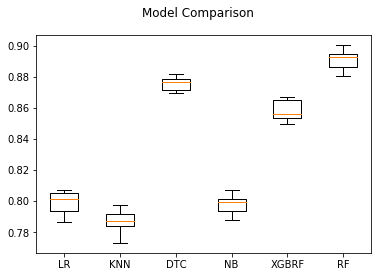

In [64]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()